# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [2]:
arr=np.array(np.zeros(10))
arr[4]=1
arr=arr.reshape(2,5)

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [3]:
arr=np.array(np.arange(10,50))
arr=arr[::-1]
arr_even=[x for x in arr if x%2==0]

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [4]:
arr=np.array(np.arange(0,9)).reshape(3,3)

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [5]:
arr=np.random.rand(4,3,2)
arr_max=arr.max()
arr_min=arr.min()

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [6]:
a=np.random.rand(6,4)
b=np.random.rand(4,3)
matmul=np.dot(a,b)

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное отклонение. Нормализуйте этот массив.

In [7]:
arr=np.random.rand(7,7)
mean=arr.mean()
sd=arr.std()
norm=(arr-mean)/sd

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [9]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Посмотрите на первые 5 строчек

In [50]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [10]:
n_rows=tips.shape[0]
n_cols=tips.shape[1]

### Проверьте есть ли пропуски в данных

In [12]:
nan=tips[pd.isna(tips).any(axis=1)]
nan

,total_bill,tip,sex,smoker,day,time,size


### Посмотрите на распределение числовых признаков

In [58]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='size', ylabel='Count'>

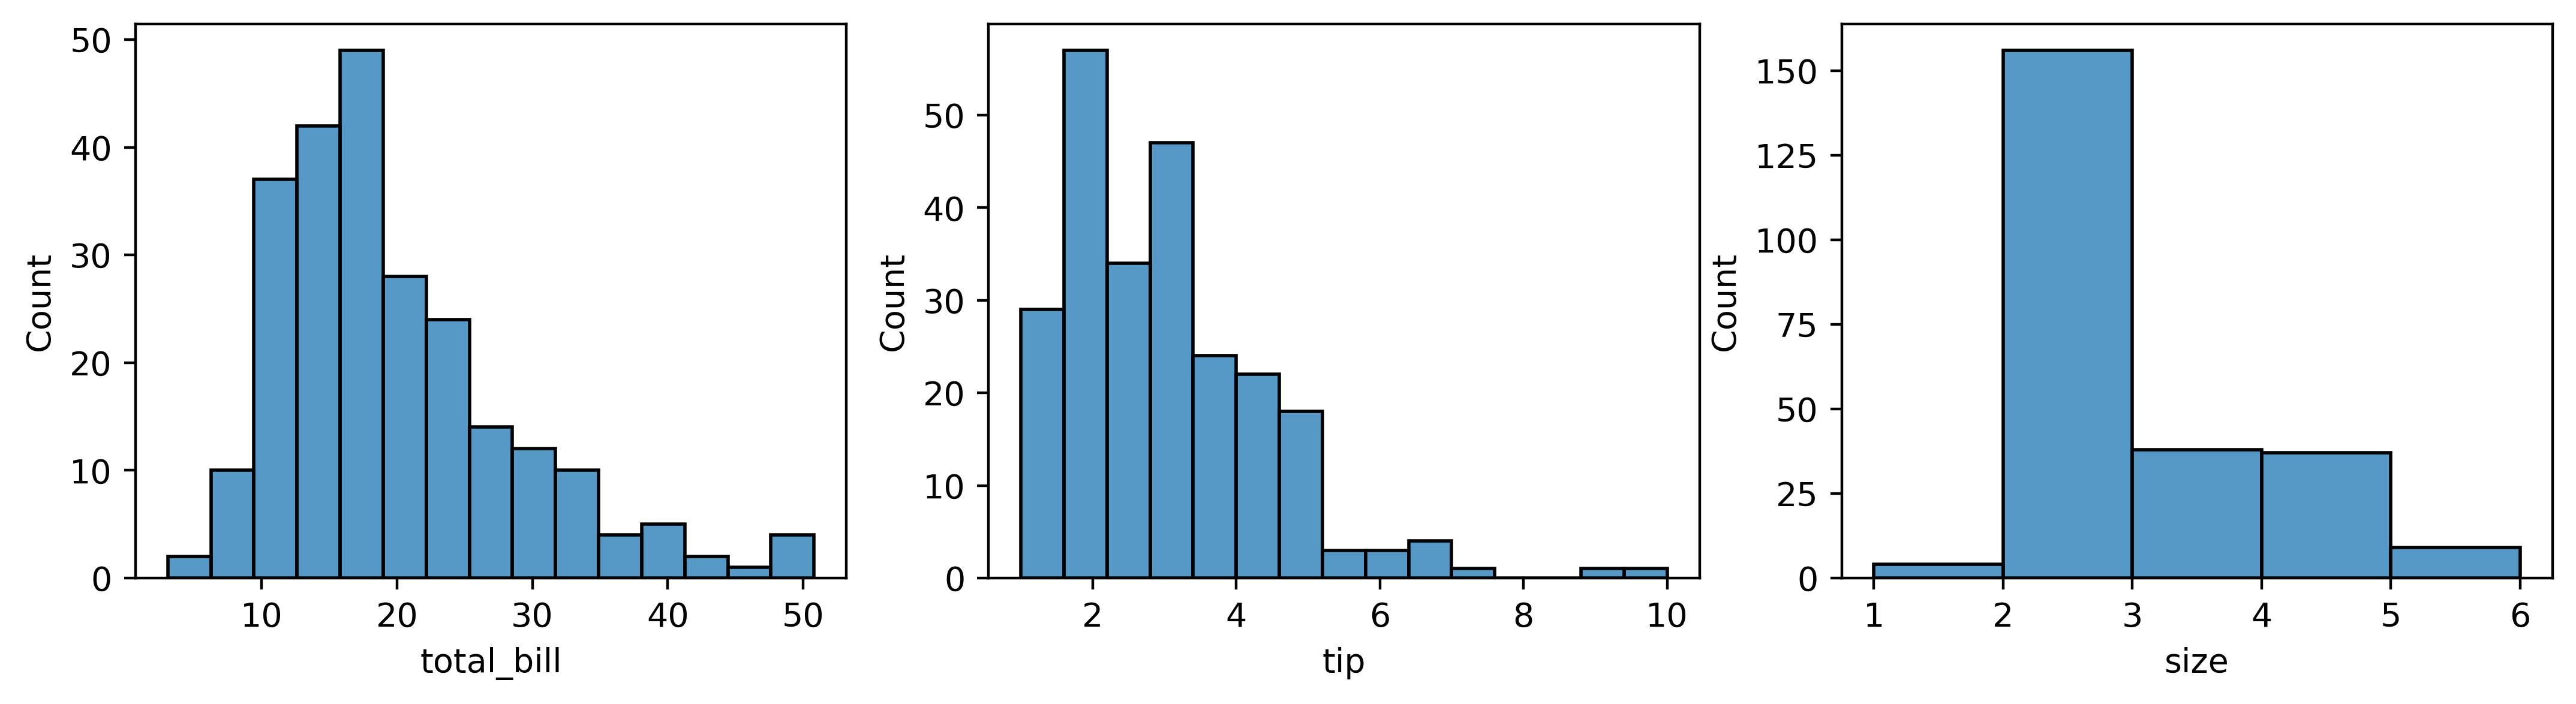

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(13, 3),dpi=400)
sns.histplot(tips['total_bill'],bins=15,ax=axes[0])
sns.histplot(tips['tip'],bins=15,ax=axes[1])
sns.histplot(tips['size'],bins=5,ax=axes[2])

### Найдите максимальное значение 'total_bill'

In [14]:
max_bill=tips['total_bill'].max()
max_bill

50.81

### Найдите количество курящих людей

In [15]:
smokers=tips[tips['smoker']=='Yes'].shape[0]
smokers

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [21]:
total_bll_day=tips.groupby('day').mean()['total_bill']
total_bll_day

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [17]:
total_bill_median=tips[tips['total_bill']>tips['total_bill'].median()]

In [41]:
#tips in dependance of sex (total bill more than median)
tip_sex=total_bill_median.groupby('sex').mean()['tip']
tip_sex

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

In [42]:
#tips in dependance of sex
tip_sex=tips.groupby('sex').mean()['tip']
tip_sex

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [18]:
#total bill in dependance of sex
bill_sex=tips.groupby('sex').mean()['total_bill']
bill_sex

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [20]:
#total bill in dependance of sex (total bill more than median)
bill_sex=total_bill_median.groupby('sex').mean()['total_bill']
bill_sex

sex
Male      26.527079
Female    26.118485
Name: total_bill, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [24]:
tips['smoker']=np.where((tips['smoker']=='Yes'),1,0)

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

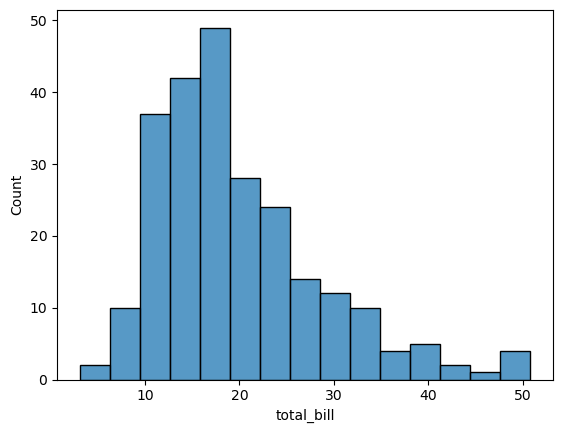

In [30]:
sns.histplot(tips['total_bill'],bins=15)

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

C:\Users\anastasia.golubova\AppData\Local\anaconda3\envs\requirements\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

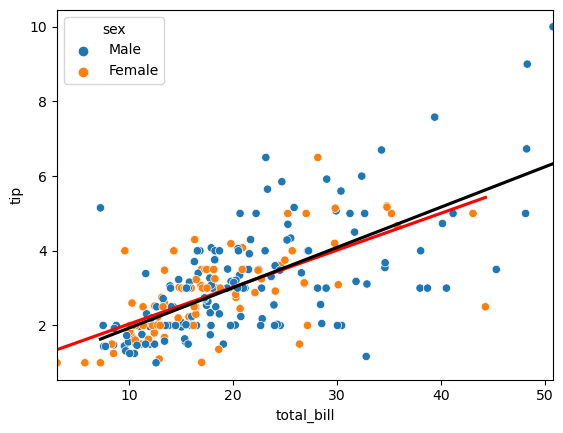

In [27]:
sns.scatterplot('total_bill','tip',data=tips,hue='sex')
sns.regplot(x='total_bill',y='tip',data=tips[tips['sex']=='Female'], scatter=False, color='red',ci=None)
sns.regplot(x='total_bill',y='tip',data=tips[tips['sex']=='Male'], scatter=False, color='black',ci=None)

In [39]:
#Correlation between total_bill and tips depending on sex
slope, intercept = np.polyfit(tips['total_bill'][tips['sex'] == 'Male'], 
                              tips['tip'][tips['sex'] == 'Male'], 1)
print(f'slope_Male: {slope}, intercept_Male: {intercept}')
slope1, intercept1 = np.polyfit(tips['total_bill'][tips['sex'] == 'Female'], 
                              tips['tip'][tips['sex'] == 'Female'], 1)
print(f'slope_Female: {slope1}, intercept_Female: {intercept1}')

slope_Male: 0.10786067760964224, intercept_Male: 0.8521476939322601
slope_Female: 0.09887791997192819, intercept_Female: 1.0480199036793036


### Постройте pairplot

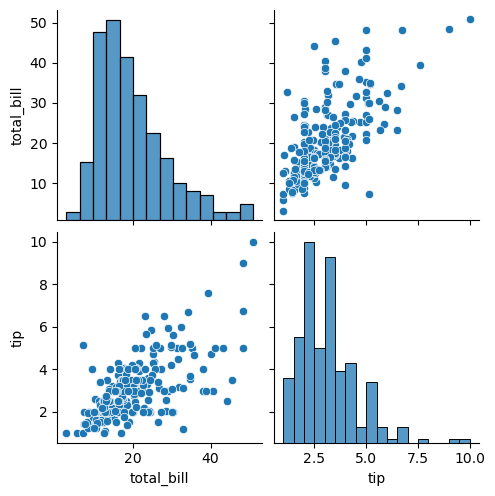

In [34]:
sns.pairplot(tips[['total_bill','tip']])

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<AxesSubplot:xlabel='day', ylabel='total_bill'>

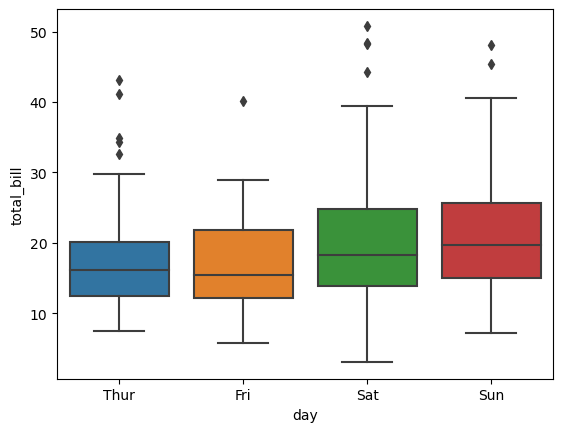

In [29]:
sns.boxplot(x='day',y='total_bill',data=tips)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<AxesSubplot:xlabel='tip', ylabel='Count'>

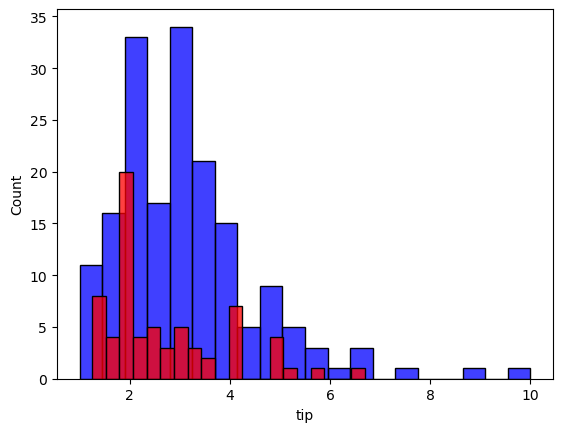

In [30]:
sns.histplot(tips['tip'][tips['time']=='Dinner'],bins=20,color='blue')
sns.histplot(tips['tip'][tips['time']=='Lunch'],bins=20,color='red')

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

C:\Users\anastasia.golubova\AppData\Local\anaconda3\envs\requirements\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anastasia.golubova\AppData\Local\anaconda3\envs\requirements\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

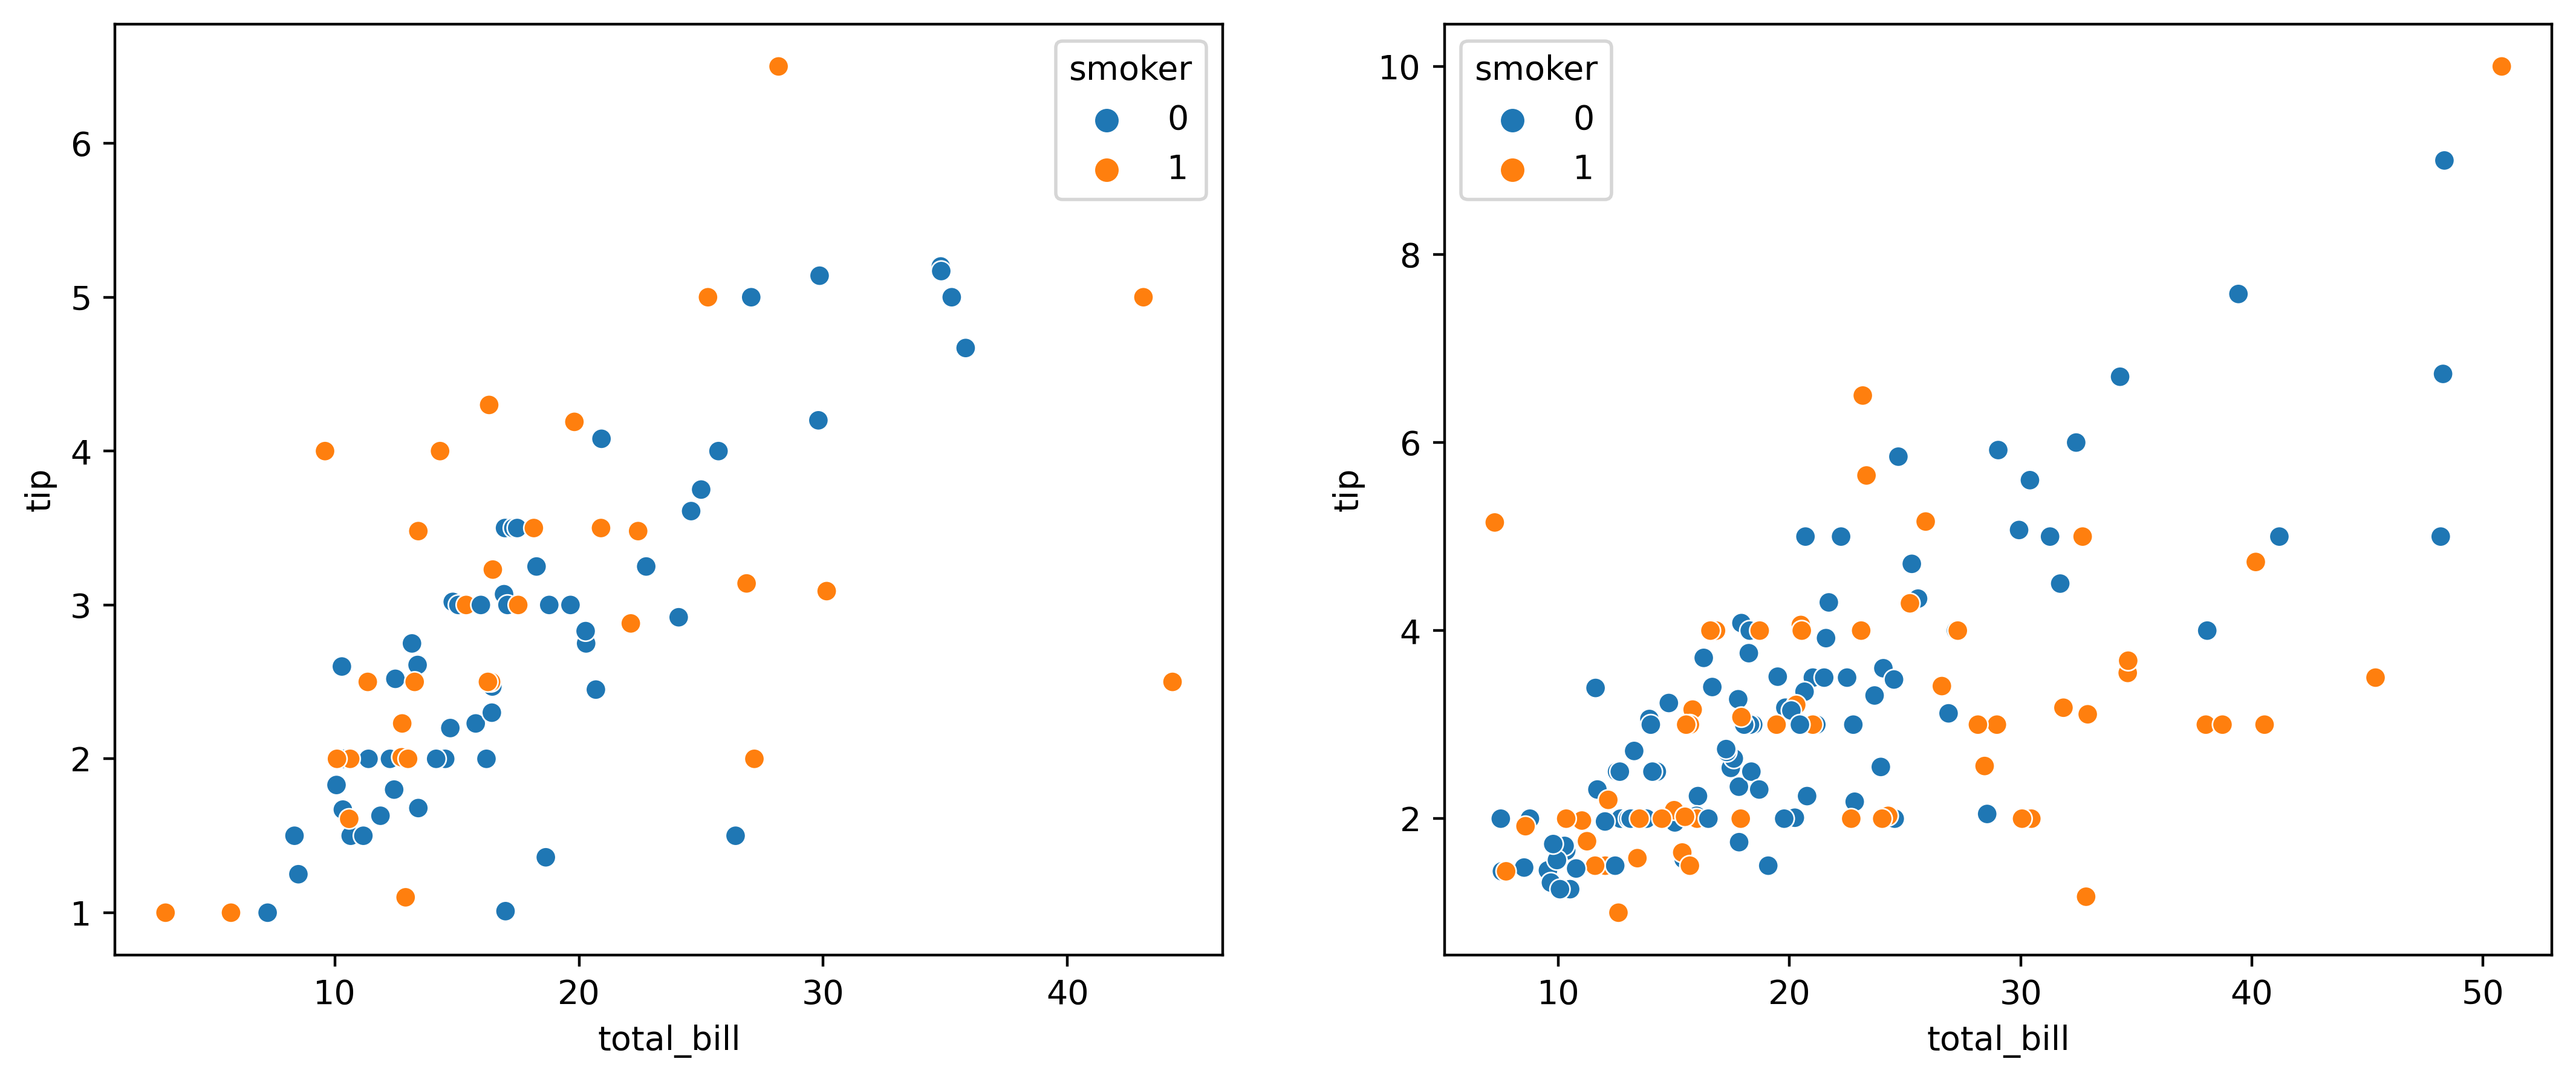

In [52]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(13, 5),dpi=400)
tips_fem=tips[tips['sex']=='Female']
tips_male=tips[tips['sex']=='Male']
sns.scatterplot('total_bill','tip',data=tips_fem,hue='smoker',ax=axes[0])
sns.scatterplot('total_bill','tip',data=tips_male,hue='smoker',ax=axes[1])

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

Признак "total_bill" имеет распределение, близкое к нормальному, при этом его значение варьируется, в зависимости от дня недели. Наибольшее значение общего счета наблюдается в воскресение. Также наблюдается различие по полу: средний счет мужчин, как правило, больше, чем у женщин (требуется проверка статистической значимости отличий). Кроме того, есть положительная зависимость между общим счетом (total_bill) и оставляемыми чаевыми (tips), как для женщин, так и для мужчин. Во время ужина (Dinner) люди оставляют больше чаевых, чем во время ланча (Lunch). 